# **Data Profiling of the Global Income Inequality csv**

This notebook explores the "Students Performance in Exams" dataset, which contains information on 1,000 students, including demographic details and their scores in three core subjects: Math, Reading, and Writing. The dataset comprises features such as gender, race/ethnicity, parental education level, type of lunch received, and whether students completed a test preparation course. These variables provide an opportunity to analyze the relationship between student demographics and academic performance.

The primary objective of this analysis is to conduct a detailed data profiling process, identifying key data quality issues and assessing their impact on potential analysis, modeling tasks and social/moral/societal implications. Procedures will include exploratory data analysis to understand the dataset’s structure, identifying missing values, inconsistencies, or outliers, and quantifying these issues. Additionally, visualizations and summary statistics will be employed to support the identification and communication of insights.

Finally, three key data quality issues will be explored in-depth, with attention given to their implications for analysis and potential societal impacts, such as bias or fairness concerns. Recommendations for addressing these issues will be proposed, ensuring the dataset is more reliable and suitable for future exploration or predictive modeling tasks.

### **Imports**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

### **Loading the dataset**

In [5]:
# Loading the dataset
file_path = 'StudentsPerformance.csv' 
df = pd.read_csv(file_path)

### **Dataset Understanding**

In [4]:
df # Displaying the dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [31]:
print("Shape of the dataset (rows, columns):", df.shape) # Displaying the shape of the dataset

Shape of the dataset (rows, columns): (1000, 8)


The dataset contains **1,000 rows** and **8 columns**, representing **1,000 student observations** across various demographic and academic features.

In [6]:
df.describe() # Displaying the summary statistics of the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


It can be seen that all three subjects have 1,000 data points. 

The average scores are relatively close, with math having a mean of 66.09, reading 69.17, and writing 68.05. The standard deviation for all three subjects is around 15, indicating moderate variability in student performance.

Interestingly, the minimum math score is 0, suggesting that some students failed or did not participate in the exam, while the maximum score for all subjects is 100, indicating perfect scores for some students. 

The interquartile ranges show that the middle 50% of students scored between 57 and 77 in math, 59 and 79 in reading, and 57.75 and 79 in writing.

In [7]:
df.describe(include='object') # Displaying the summary statistics of the dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


The distribution of the **gender** can be observed, with 518 female and 482 male students. 

The **race/ethnicity** column contains five unique categories, with "group C" being the most frequent (319 students). 

The **parental level of education** varies across six distinct levels, with "some college" being the most common (226 students). 

The **lunch** variable shows a majority of students (645) receive standard lunch, while 355 are on a free/reduced lunch plan, possibly reflecting socio-economic factors. 

Finally, the **test preparation course** shows that most students (642) did not complete the course, which could potentially affect their performance in exams.

In [32]:
# Checking for missing values
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
print("Number of duplicate rows:", df.duplicated().sum()) # Checking for duplicate rows

Number of duplicate rows: 0


There are **no missing values** or **duplicate rows**, indicating that the dataset is well-structured and ready for analysis.

In [34]:
# Checking for the data types of each column
print("Data types of each column:")
display(df.dtypes)

Data types of each column:


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

The features include both categorical (e.g., gender, race/ethnicity, parental education) and numerical variables (math, reading, and writing scores).

In [35]:
# Displaying the unique values in the categorical columns
print("Unique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

Unique values in categorical columns:

Unique values in gender:
['female' 'male']

Unique values in race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in lunch:
['standard' 'free/reduced']

Unique values in test preparation course:
['none' 'completed']


The dataset’s categorical columns contain several unique values that capture demographic and educational aspects of the students. For **gender**, there are two categories: 'female' and 'male', indicating a binary classification of students. In the **race/ethnicity** column, there are five distinct groups ('group A', 'group B', 'group C', 'group D', and 'group E'), which likely represent different racial or ethnic categories, although the specific meanings of these groups are not detailed.

The **parental level of education** contains six unique values, ranging from 'some high school' to "master's degree", with intermediate levels such as "associate's degree" and 'some college', offering a broad spectrum of parental educational backgrounds.

In the **lunch** column, students are categorized into two groups: those receiving a 'standard' lunch and those on a 'free/reduced' lunch plan, potentially reflecting socioeconomic status. Finally, the **test preparation course** has two unique values: 'none' and 'completed', indicating whether students took a preparation course prior to the exams, a variable that could have a direct impact on their test scores.

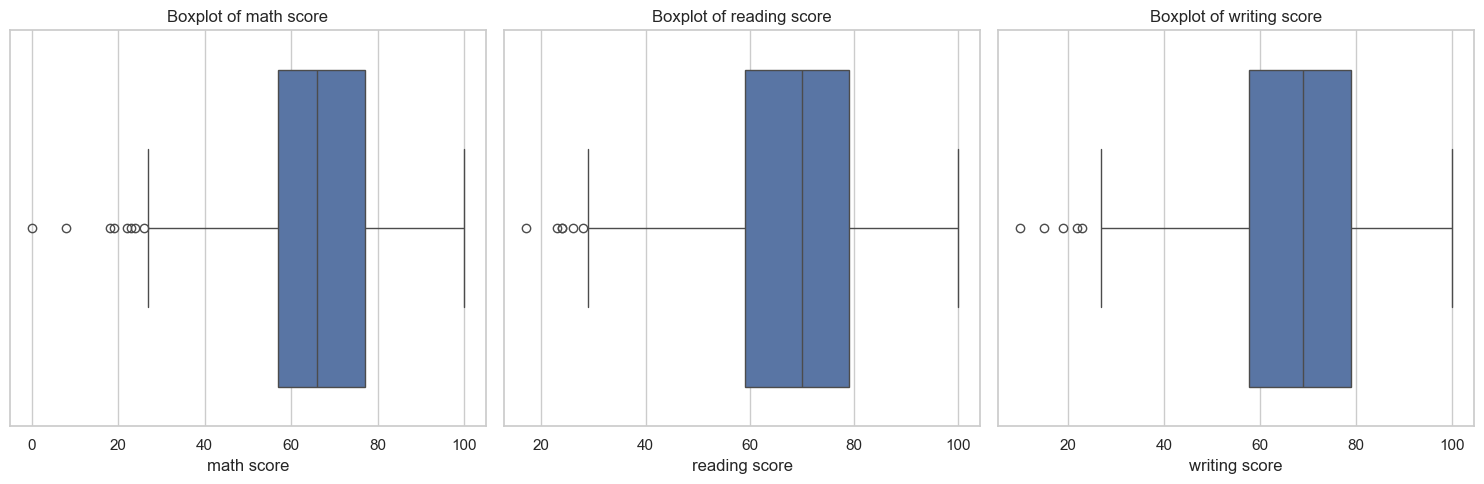

In [24]:
# Outliers detection 
score_columns = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 5))  

for i, column in enumerate(score_columns):
    plt.subplot(1, 3, i + 1)  
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout() 
plt.show()


In these boxplots, all three subjects—**math, reading, and writing**—show some outliers on the lower end of the score range. Specifically, there are students who scored particularly low in math (close to 0), reading (as low as 17), and writing (as low as 10). These low scores may indicate anomalies in student performance, missing or incomplete exam responses, or special cases that warrant further investigation.

The **math score** has the most pronounced spread of outliers below the lower quartile, with several students scoring very low compared to the main bulk of scores, which are more concentrated between 60 and 80. Similarly, the **reading** and **writing** scores have fewer outliers, but these students still performed far below the rest.

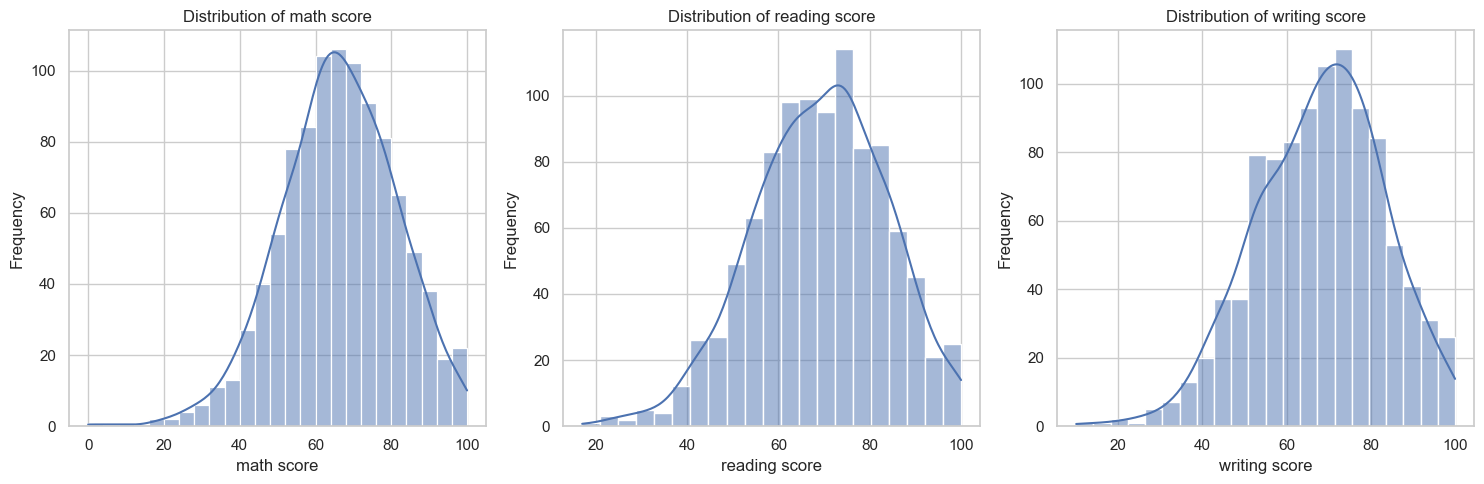

In [25]:
# Distribution analysis
score_columns = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(15, 5))  

for i, column in enumerate(score_columns):
    plt.subplot(1, 3, i + 1)  
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()


The distribution analysis of the **math**, **reading**, and **writing** scores, as represented in the histograms, provides insight into the general performance trends of the students. Each distribution follows a bell-shaped curve, which resembles a normal distribution, though there are some slight deviations.

For **math scores**, the distribution is slightly skewed to the left, with the peak occurring around the 60-80 range. This indicates that the majority of students scored above average, but there are still several students who scored below 40, as seen in the tail extending to the lower end.

The **reading scores** display a similar pattern, with most scores concentrated in the 60-80 range. However, this distribution is more symmetric compared to the math scores, indicating a balanced performance among students in this subject.

Finally, the **writing scores** also demonstrate a normal distribution centered around 70-80, with a slightly longer left tail. This suggests that while most students performed well in writing, a few scored significantly lower, consistent with the previously identified outliers.

These distributions highlight that, on average, students tend to perform fairly well across all three subjects, with few extreme cases on the lower end.

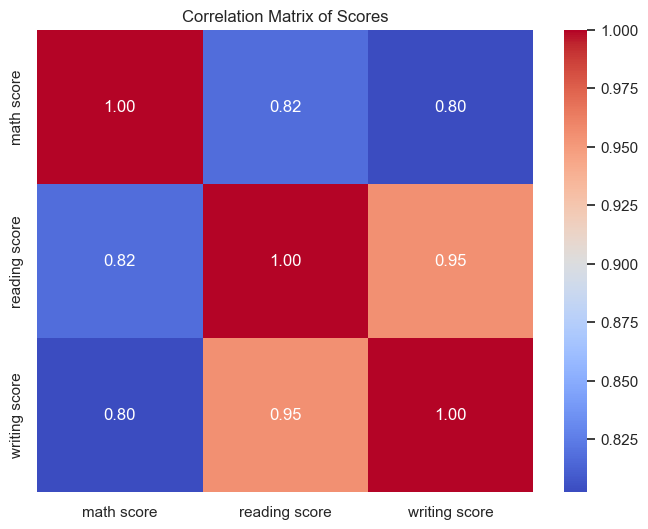

In [26]:
# Correlation analysis
score_columns = ['math score', 'reading score', 'writing score']
correlation_matrix = df[score_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Scores')
plt.show()

Each cell in the matrix shows the Pearson correlation coefficient between the corresponding pair of scores. The off-diagonal values reflect the correlation between different scores: **math and reading** have a correlation of 0.82, **math and writing** have a slightly lower correlation at 0.80, and **reading and writing** show the strongest correlation at 0.95. This suggests that students who perform well in reading tend to perform similarly well in writing, while the correlation between math and both language-related skills (reading and writing) is somewhat weaker but still strong. 

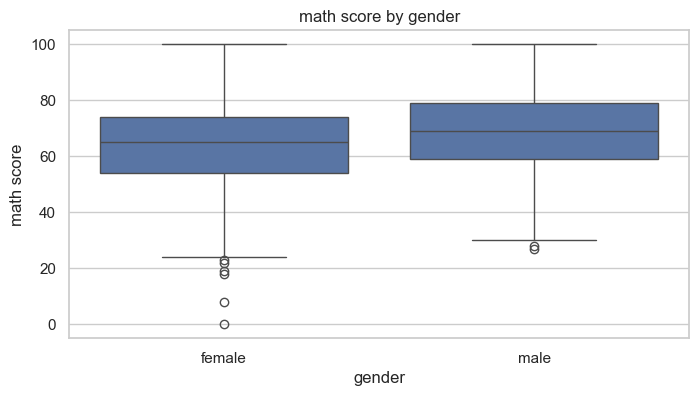

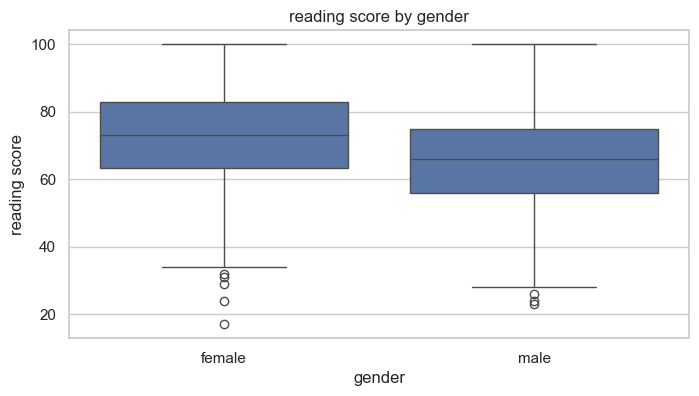

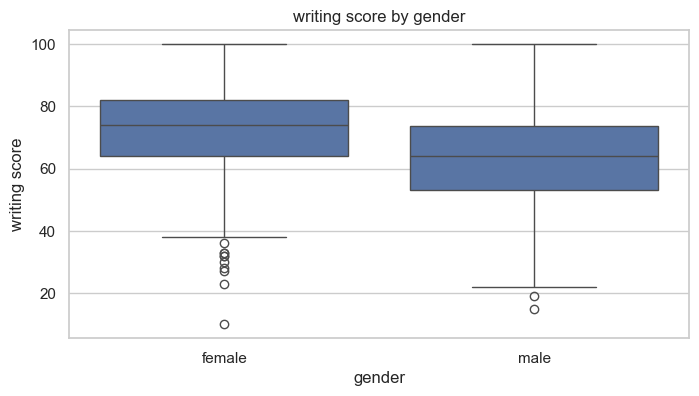

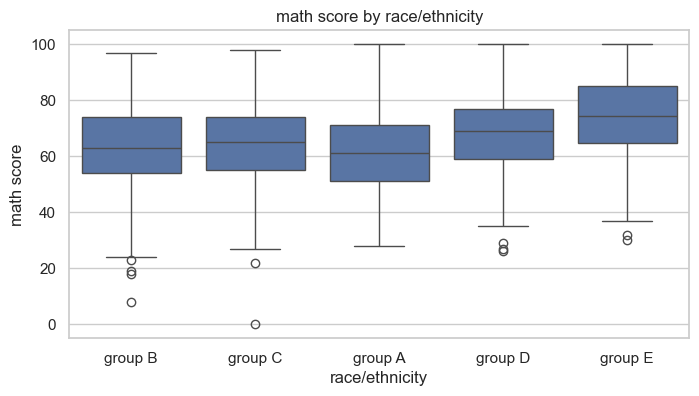

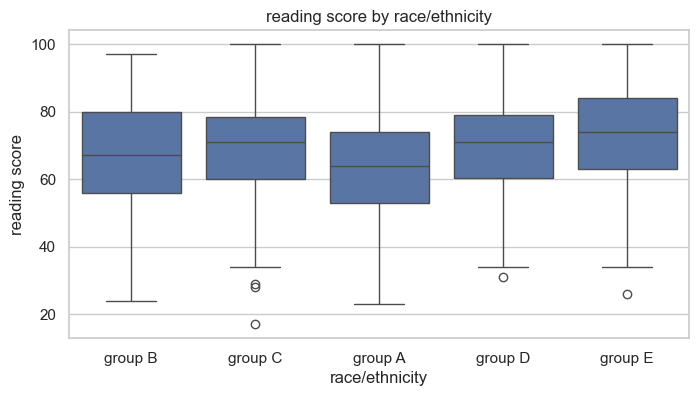

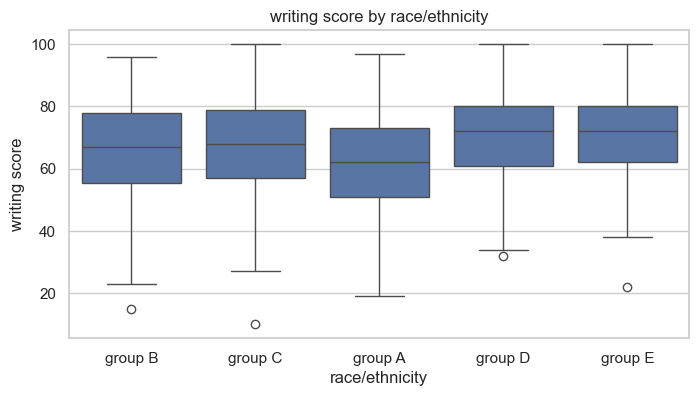

In [30]:
# Bias analysis
def bias_analysis(df, target, group):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[group], y=df[target])
    plt.title(f'{target} by {group}')
    plt.xlabel(group)
    plt.ylabel(target)
    plt.show()

for column in score_columns:
    bias_analysis(df, column, 'gender')

for column in score_columns:
    bias_analysis(df, column, 'race/ethnicity')


The analysis uses boxplot visualizations to explore potential biases in academic performance based on gender and race/ethnicity. The aim is to identify any differences in central tendency, variability, and outliers across different demographic groups. These visualizations help highlight performance disparities that may warrant further investigation.

#### **Math Scores by Gender**
The boxplot comparing math scores by gender reveals that the median score for males is slightly higher than that for females, suggesting a small difference in central tendency. However, both genders exhibit a similar range of scores, with outliers present in each group. While this visual representation highlights some gender-based differences in math performance, it does not inherently indicate bias. Nevertheless, further investigation may be needed to assess whether these differences are statistically significant or socially meaningful.

#### **Reading Scores by Gender**
In the boxplot for reading scores, female students show a higher median score than males, indicating stronger performance on average. Females also have a slightly narrower interquartile range (IQR), suggesting less variability in their scores compared to males. Despite the presence of outliers in both groups, the overall trend shows females outperforming males in reading. While this does not immediately signal bias, it raises questions about the factors contributing to the observed gender differences in reading performance.

#### **Writing Scores by Gender**
The boxplot for writing scores follows a similar pattern to reading, with females outperforming males based on median scores. The IQR for females is also slightly narrower, implying more consistent performance within the group. The presence of outliers in both gender groups does not detract from the general observation that females tend to score higher in writing. Again, the graph does not directly point to bias but highlights the importance of exploring potential underlying factors that contribute to these differences.

#### **Math Scores by Race/Ethnicity**
The boxplot comparing math scores across different racial/ethnic groups reveals noticeable differences in median scores and score distribution. The median scores vary significantly, suggesting disparities in performance between groups. Group C, for example, has the highest concentration of students, which could influence the overall distribution, while Group A, with the smallest number of students, shows the widest range of scores. Although the graph does not immediately indicate bias, the unequal representation of racial/ethnic groups (with 319 students from Group C compared to only 89 in Group A) suggests that imbalances in the data could affect the analysis and should be accounted for in future studies.

#### **Reading Scores by Race/Ethnicity**
The reading scores boxplot shows similar trends to math, with differences in medians and variability across racial/ethnic groups. Groups with fewer students (such as Group A) show more outliers and variability compared to more populous groups (such as Group C). These imbalances in group sizes make it difficult to draw concrete conclusions about performance disparities without further statistical analysis to account for sample size differences. Although the graph does not directly show bias, it does highlight the need to address the unequal distribution of racial/ethnic groups in the dataset.

#### **Writing Scores by Race/Ethnicity**
The boxplot for writing scores also reveals differences in median scores and score variability across racial/ethnic groups. Similar to the reading and math scores, larger groups (such as Group C) show less variability and fewer outliers compared to smaller groups (such as Group A). The unequal representation of students from different racial/ethnic groups suggests that caution is needed when interpreting these results, as the imbalances could introduce biases in the analysis. The graph highlights the importance of considering these disparities in future performance evaluations and predictive modeling tasks.

### **Data Profiling**

In [6]:
profile = ProfileReport(df, title="Students Performance", explorative=True) 
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Considerations of Imbalanced Groups

While the boxplots visually suggest differences in performance by gender and race/ethnicity, it’s important to note the imbalance in group sizes within the dataset, revealed by its profile. There are 518 female students compared to 482 male students, which may influence the central tendency and variability observed in the gender-based analysis. Similarly, racial/ethnic groups are not equally represented, with Group C comprising 319 students, while Group A includes only 89. These imbalances may affect the fairness of any conclusions drawn from the data.

<img src="imbalanced_groups.png" alt="Imbalanced Groups" width="1250">


In [7]:
profile.to_file("students_performance.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Key Data Quality Issues**

#### **Imbalance in Demographic Groups**

The dataset reveals significant imbalances in key demographic
 groups, with 518 female students compared to 482 male students,
 andadisproportionaterepresentationamongdifferentrace/ethnicity
 categories (e.g., 319 students in Group C versus 89 in Group A). Such imbalances can skew analysis and predictive
 modeling outcomes, as certain groups may dominate the findings,
 leading to biased interpretations or inaccurate predictions for un
derrepresented groups.
 This issue was identified through basic summary statistics and
 frequency counts of categorical variables. The distribution of gen
der and race/ethnicity highlighted noticeable disparities in group
 sizes, prompting further investigation into the implications of these
 imbalances.

##### Consequences

When conducting analyses such as hypothesis testing or model
ing, underrepresented groups may yield unstable or less generaliz
able results, particularly when using models that assume balanced
 class distributions. This can lead to misleading conclusions about
 the overall population. Another major consequence is that the pre
dictive models may overfit to the dominant groups (e.g., Group C
 in race/ethnicity), resulting in poorer performance for minority
 groups (e.g., Group A). On a more social-related side, unequal rep
resentation of racial/ethnic groups or gender in the data can lead to
 biased conclusions, reinforcing societal stereotypes about academic
 performance and perpetuating systemic inequalities. Conclusions
 drawnfromimbalanceddatamayinformeducationpoliciesorinter
ventions, potentially benefiting certain groups disproportionately
 while neglecting others, thereby exacerbating existing disparities.

##### Proposed Solutions

In order to mitigate the upper mentioned issues, an increasing
 of the representation of underrepresented groups (e.g., enhancing
 the weight of Group A) can help create a more balanced dataset.
 Techniques such as Synthetic Minority Over-sampling Technique
 (SMOTE) can be employed to generate synthetic samples for mi
nority classes, improving model performance and fairnes.
 Future data collection initiatives should also prioritize equitable
 representation of different demographic groups. This can involve
 targeted outreach and engagement strategies to ensure that un
derrepresented populations are adequately included in the dataset. Employing bias mitigation techniques during model training,
 such as reweighting or using fairness-aware algorithms, can also
 help address the disparities in model performance across different
 demographic groups.

### **Presence of Outliers**

Outliers are present, particularly in math scores, with some stu
dents scoring 0 or other very low values (e.g., reading: 17, writing:
 10). These extreme values could represent errors, missing informa
tion, or students who failed to complete the exams. Outliers can
 distort statistical summaries (e.g., means, standard deviations) and
 negatively impact machine learning algorithms, especially those
 sensitive to outliers (e.g., linear regression, k-means clustering).
 The issue was detected using boxplots and summary statistics,
 where extreme values were evident as points beyond the interquar
tile range (IQR). Further investigation revealed that math scores
 had the most pronounced number of low outliers.

##### **Consequences**

Outliers can skew results, causing overestimation or underes
timation of performance metrics. Many machine learning models
 can be sensitive to outliers, potentially leading to inaccurate pre
dictions. For instance, a regression model might fit poorly due to
 extreme values influencing the slope. Another significant drawback
 is if these outliers represent students who had difficulty accessing
 exams (e.g., due to socio-economic barriers or language difficul
ties), ignoring or excluding them from the analysis may further
 marginalize already vulnerable populations.

##### **Proposed Solutions**

For cases where the outlier represents missing data (e.g., a score
 of 0 due to non-participation), it should be considered imputing
 reasonable values based on student demographics or performance
 in other subjects. Imputation methods such as mean imputation,
 median imputation, or more sophisticated techniques like multiple
 imputation can be used to handle missing data. Another ap
proach would be limiting the impact of extreme values by capping
 them at a certain threshold. Winsorization involves replacing the
 extreme values with the nearest value within a specified percentile
 range, thereby reducing the influence of outliers on the analysis.
 The use of models less sensitive to outliers, such as decision trees
 or robust regression techniques could also be a solution. Robust
 regression methods, like RANSAC (Random Sample Consensus)
 or Huber regression, can provide more reliable estimates in the
 presence of outliers.

### **Potential Confounding from Socio-Economic Status (Lunch Type)**

The lunch type variable serves as a proxy for socio-economic sta
tus (SES), with 355 students receiving free/reduced lunch and 645
 students receiving standard lunch. This indicator is correlated with
 student performance, where students on free/reduced lunch tend
 to perform worse on average across all three subjects. Without
 addressing this confounder, it becomes challenging to distinguish
 whether performance differences are due to demographic charac
teristics (e.g., gender, race/ethnicity) or socio-economic factors.
 The relationship between lunch type and academic performance
 was identified through summary statistics and basic visualizations,
 such as the correlation map, which revealed lower
 median scores for students on free/reduced lunch compared to their
 peers.

##### **Consequences**

If SES is not controlled for, policies or interventions based on
 the data could disproportionately harm or benefit certain socio
economic groups, perpetuating inequities in educational access and
 resources. This could further entrench existing disparities rather
 than alleviate them. Predictive models may also inadvertently cap
ture socio-economic disparities instead of the intended variables,
 leading to confounded and biased predictions. This can result in
 models that do not accurately reflect the true relationships among
 variables.

##### **Proposed Solutions**

 In anypredictive modeling or analysis, ensure that lunch type (as
 a proxy for SES) is included as a control variable. This allows for the
Data Profiling of the Students Performance dataset
 isolation of its effect on performance, enabling a clearer understand
ing of the relationships among demographic factors and academic
 outcomes.If performancedisparities are primarily driven by SES,
 educational policies should focus on providing additional resources
 and support to students from lower socio-economic backgrounds.
 This could include enhanced tutoring programs, access to learning
 materials, and initiatives aimed at improving overall school climate
 and support systems.